# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


##### 1. What does the data describe?

The data describes math and verbal scores in various states with those states' participation rates.

##### 2. Does the data look complete? Are there any obvious issues with the observations?

When were these scores recorded? The SAT has been changed multiple times, so a score of 600 during one period of time isn't the same as a score of 600 during another period of time.

##### 3. Create a data dictionary for the dataset.

In [3]:
dataset = {}

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [4]:
import csv
import pandas as pd

score_list = []

sat_scores = '../assets/sat_scores.csv'

with open(sat_scores, 'r') as f:
    reader = csv.reader(f)
    for score in reader:
        score_list.append(score)

##### 5. Print the data

In [5]:
print score_list

[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [21]:
labels = score_list[0]

#Excluding data for 'all' states as we'll be calculating variance and standard deviation later.
scores = score_list[1:(len(score_list) - 1)]

print labels
print scores

['State', 'Rate', 'Verbal', 'Math']
[['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12'

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [7]:
state = [data[0] for data in scores]

print state

['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NB', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


##### 8. Print the types of each column

In [8]:
#The types of all values in one column should be the same 
#(as indicated by printing 'scores'), so I took the type of 
#only one value in each column.

column_types = [type(data[i]) for i in range(len(data))]

print column_types

[<type 'str'>, <type 'str'>, <type 'str'>, <type 'str'>]


##### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [24]:
new_scores = [[float(data[i]) for data in scores] for i in range(1, 4)]

print new_scores

[[82.0, 81.0, 79.0, 77.0, 72.0, 71.0, 71.0, 69.0, 69.0, 68.0, 67.0, 65.0, 65.0, 63.0, 60.0, 57.0, 56.0, 55.0, 54.0, 53.0, 53.0, 52.0, 51.0, 51.0, 34.0, 33.0, 31.0, 26.0, 23.0, 18.0, 17.0, 13.0, 13.0, 12.0, 12.0, 11.0, 11.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 5.0, 5.0, 4.0, 4.0, 4.0], [509.0, 499.0, 511.0, 495.0, 520.0, 501.0, 500.0, 511.0, 506.0, 510.0, 501.0, 508.0, 493.0, 491.0, 499.0, 486.0, 482.0, 526.0, 498.0, 527.0, 493.0, 485.0, 514.0, 498.0, 523.0, 509.0, 539.0, 534.0, 539.0, 527.0, 543.0, 562.0, 551.0, 576.0, 550.0, 547.0, 561.0, 580.0, 577.0, 559.0, 562.0, 567.0, 577.0, 564.0, 584.0, 562.0, 575.0, 593.0, 577.0, 592.0, 566.0], [510.0, 513.0, 515.0, 505.0, 516.0, 499.0, 499.0, 506.0, 500.0, 501.0, 499.0, 510.0, 499.0, 489.0, 501.0, 488.0, 474.0, 526.0, 499.0, 527.0, 499.0, 515.0, 510.0, 517.0, 525.0, 515.0, 542.0, 439.0, 539.0, 512.0, 542.0, 553.0, 542.0, 589.0, 550.0, 545.0, 572.0, 589.0, 580.0, 554.0, 568.0, 561.0, 577.0, 562.0, 596.0, 550.0, 570.0, 603.0, 582.0, 59

##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [10]:
state_data = {state[i]:[k[i] for k in new_scores] for i in range(len(state))}

print state_data

{'WA': [53.0, 527.0, 527.0], 'DE': [67.0, 501.0, 499.0], 'DC': [56.0, 482.0, 474.0], 'WI': [6.0, 584.0, 596.0], 'WV': [18.0, 527.0, 512.0], 'HI': [52.0, 485.0, 515.0], 'FL': [54.0, 498.0, 499.0], 'WY': [11.0, 547.0, 545.0], 'NH': [72.0, 520.0, 516.0], 'NJ': [81.0, 499.0, 513.0], 'NM': [13.0, 551.0, 542.0], 'TX': [53.0, 493.0, 499.0], 'LA': [7.0, 564.0, 562.0], 'NB': [8.0, 562.0, 568.0], 'NC': [65.0, 493.0, 499.0], 'ND': [4.0, 592.0, 599.0], 'TN': [13.0, 562.0, 553.0], 'NY': [77.0, 495.0, 505.0], 'PA': [71.0, 500.0, 499.0], 'RI': [71.0, 501.0, 499.0], 'NV': [33.0, 509.0, 515.0], 'VA': [68.0, 510.0, 501.0], 'CO': [31.0, 539.0, 542.0], 'AK': [51.0, 514.0, 510.0], 'AL': [9.0, 559.0, 554.0], 'AR': [6.0, 562.0, 550.0], 'VT': [69.0, 511.0, 506.0], 'IL': [12.0, 576.0, 589.0], 'GA': [63.0, 491.0, 489.0], 'IN': [60.0, 499.0, 501.0], 'IA': [5.0, 593.0, 603.0], 'OK': [8.0, 567.0, 561.0], 'AZ': [34.0, 523.0, 525.0], 'CA': [51.0, 498.0, 517.0], 'ID': [17.0, 543.0, 542.0], 'CT': [82.0, 509.0, 510.0],

##### 11. Create a dictionary with the values for each of the numeric columns

In [11]:
numeric_columns = {labels[i + 1]:new_scores[i] for i in range(len(new_scores))}

print numeric_columns

{'Rate': [82.0, 81.0, 79.0, 77.0, 72.0, 71.0, 71.0, 69.0, 69.0, 68.0, 67.0, 65.0, 65.0, 63.0, 60.0, 57.0, 56.0, 55.0, 54.0, 53.0, 53.0, 52.0, 51.0, 51.0, 34.0, 33.0, 31.0, 26.0, 23.0, 18.0, 17.0, 13.0, 13.0, 12.0, 12.0, 11.0, 11.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 5.0, 5.0, 4.0, 4.0, 4.0], 'Math': [510.0, 513.0, 515.0, 505.0, 516.0, 499.0, 499.0, 506.0, 500.0, 501.0, 499.0, 510.0, 499.0, 489.0, 501.0, 488.0, 474.0, 526.0, 499.0, 527.0, 499.0, 515.0, 510.0, 517.0, 525.0, 515.0, 542.0, 439.0, 539.0, 512.0, 542.0, 553.0, 542.0, 589.0, 550.0, 545.0, 572.0, 589.0, 580.0, 554.0, 568.0, 561.0, 577.0, 562.0, 596.0, 550.0, 570.0, 603.0, 582.0, 599.0, 551.0], 'Verbal': [509.0, 499.0, 511.0, 495.0, 520.0, 501.0, 500.0, 511.0, 506.0, 510.0, 501.0, 508.0, 493.0, 491.0, 499.0, 486.0, 482.0, 526.0, 498.0, 527.0, 493.0, 485.0, 514.0, 498.0, 523.0, 509.0, 539.0, 534.0, 539.0, 527.0, 543.0, 562.0, 551.0, 576.0, 550.0, 547.0, 561.0, 580.0, 577.0, 559.0, 562.0, 567.0, 577.0, 564.0, 584.0, 562.

## Step 3: Describe the data

##### 12. Print the min and max of each column

In [12]:
#I used these variables just for convenience (so I didn't have to keep typing rate, math, and verbal)
x = 'Rate'
y = 'Math'
z = 'Verbal'

minimum_rate = min(numeric_columns[x])
minimum_math = min(numeric_columns[y])
minimum_verbal = min(numeric_columns[z])

maximum_rate = max(numeric_columns[x])
maximum_math = max(numeric_columns[y])
maximum_verbal = max(numeric_columns[z])

print "Minimum rate:", minimum_rate
print "Minimum math score:", minimum_math
print "Minimum verbal score:", minimum_verbal
print "Maximum rate:", maximum_rate
print "Maximum math score:", maximum_math
print "Maximum verbal score:", maximum_verbal

Minimum rate: 4.0
Minimum math score: 439.0
Minimum verbal score: 482.0
Maximum rate: 82.0
Maximum math score: 603.0
Maximum verbal score: 593.0


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [13]:
import numpy as np

def std(column):
    avg = np.mean(column)
    diff = [((avg - value) ** 2) for value in column]
    std = np.sqrt(sum(diff) / len(column))
    
    print std
    
print "The Standard Deviation for", x, "is:",
std(numeric_columns[x])
print "The Standard Deviation for", y, "is:",
std(numeric_columns[y])
print "The Standard Deviation for", z, "is:",
std(numeric_columns[z])

The Standard Deviation for Rate is: 27.2792386761
The Standard Deviation for Math is: 35.9298731731
The Standard Deviation for Verbal is: 33.0319826842


## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

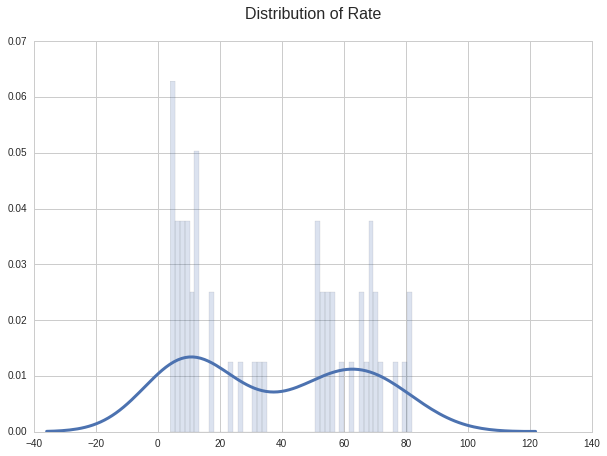

In [14]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns
%matplotlib inline

def distribution_plotter(column, data):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style("whitegrid")
    dist = sns.distplot(data, 50, hist_kws={'alpha':0.2}, kde_kws={'linewidth':3})
    dist.set_title('Distribution of ' + column + '\n', fontsize=16)

distribution_plotter(x, numeric_columns[x])

##### 15. Plot the Math distribution

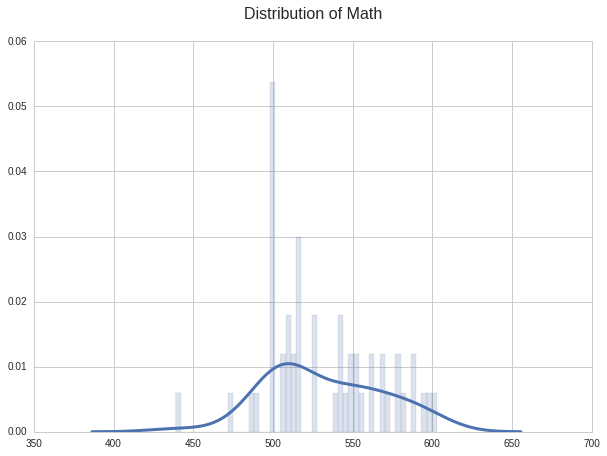

In [15]:
distribution_plotter(y, numeric_columns[y])

##### 16. Plot the Verbal distribution

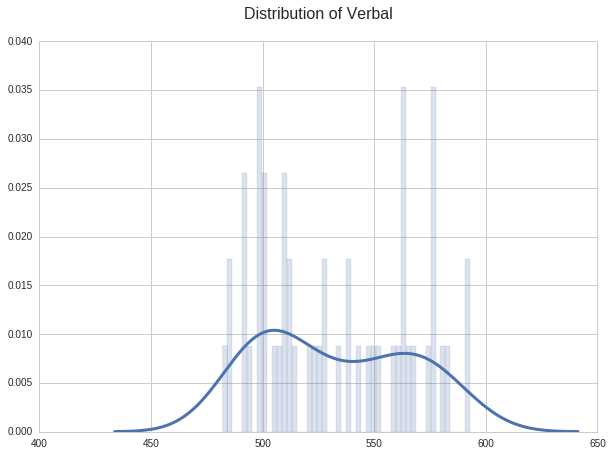

In [16]:
distribution_plotter(z, numeric_columns[z])

##### 17. What is the typical assumption for data distribution?

Most distributions are normal, and you can use the mean, median, and mode to help describe the central tendency of the data.

##### 18. Does that distribution hold true for our data?

None of these distributions are normal.

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

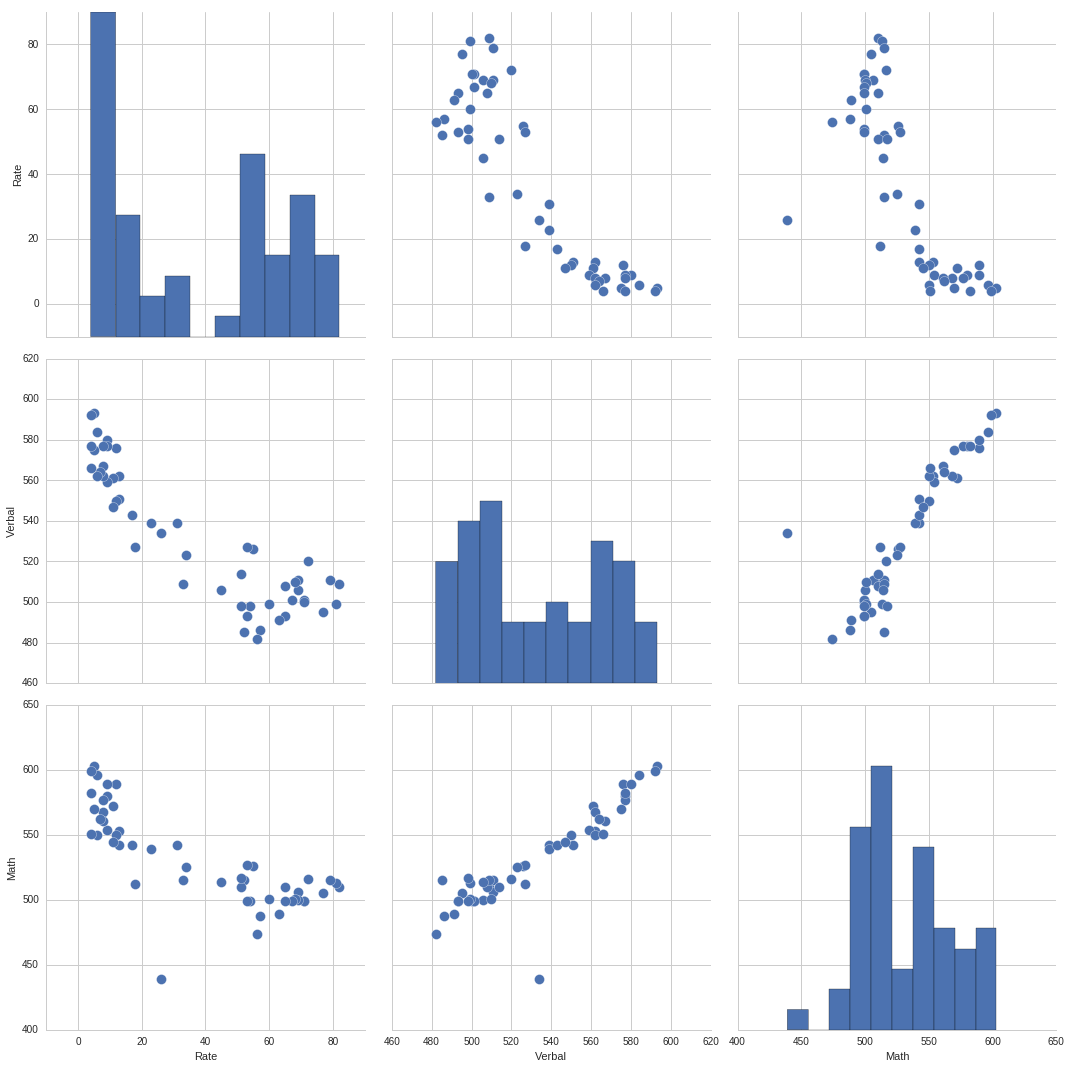

In [17]:
sns.set_style("whitegrid")

new_data = pd.read_csv('../assets/sat_scores.csv')

sns.pairplot(new_data, size = 5, plot_kws = {'s': 100})

##### 20. Are there any interesting relationships to note?

It's interesting that as the participation rate of each state increases, the verbal and math SAT scores decrease. While counter intuitive at first, this actually makes sense once you think about it. A low participation rate for a state implies that those select few students are motivated and college-bound, thus inflating the state's scores. Meanwhile, a state with a large participation rate implies that most students are taking the SAT, regardless of college-readiness. This lowers the state's overall math and verbal scores, as we can see represented in the above graph.

There's also another, more mathematical oriented reason why this negative relationship exists. A lower participation rate introduces less scores and increases biasness of the data. For example, if only ten people took the test, and 9 or those 10 scored 2100 on the SAT, then the state's overall score is going to be biased. Looking at the percentages alone without the participation rate, it looks like 90% of that particular state scored incredibly high on the SAT, which is obviously not true. On the other hand, when there's a high participation rate, more scores are introduced to the dataset, thus lowering the chance of biasness and the overall score itself, explaining the negative relationship between participation rate and verbal/math scores. 

##### 21. Create box plots for each variable. 

/home/dsi-student/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:2125: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


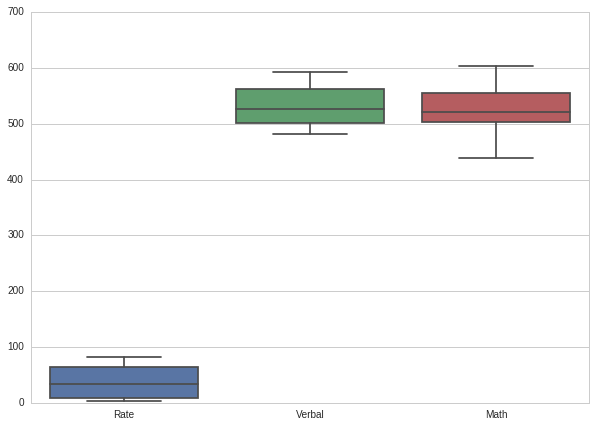

In [18]:
sns.set_style("whitegrid")
sns.boxplot(new_data)

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

Heat Map of Math Scores:

![Heat Map of Math Scores](http://snag.gy/BeLn4.jpg)

Heatmap of Verbal Scores:

![HeatMap of Verbal Scores](http://snag.gy/n06iM.jpg)

Heat Map of Participation Rate:

![Heat Map of Participation Rate](http://snag.gy/yDFnD.jpg)